In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv('/content/train_and_test2.csv')

# Fix incorrect column names
df.rename(columns={'sibsp': 'SibSp', '2urvived': 'Survived'}, inplace=True)

# Check dataset after renaming
print(df.head())


   Passengerid   Age     Fare  Sex  SibSp  zero  zero.1  zero.2  zero.3  \
0            1  22.0   7.2500    0      1     0       0       0       0   
1            2  38.0  71.2833    1      1     0       0       0       0   
2            3  26.0   7.9250    1      0     0       0       0       0   
3            4  35.0  53.1000    1      1     0       0       0       0   
4            5  35.0   8.0500    0      0     0       0       0       0   

   zero.4  ...  zero.12  zero.13  zero.14  Pclass  zero.15  zero.16  Embarked  \
0       0  ...        0        0        0       3        0        0       2.0   
1       0  ...        0        0        0       1        0        0       0.0   
2       0  ...        0        0        0       3        0        0       2.0   
3       0  ...        0        0        0       1        0        0       2.0   
4       0  ...        0        0        0       3        0        0       2.0   

   zero.17  zero.18  Survived  
0        0        0         0 

In [2]:
# Fill missing Age values with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)

# Drop rows with missing values in 'Embarked' (if any)
df.dropna(subset=['Embarked'], inplace=True)

# Display dataset info after cleaning
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1307 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1307 non-null   int64  
 1   Age          1307 non-null   float64
 2   Fare         1307 non-null   float64
 3   Sex          1307 non-null   int64  
 4   SibSp        1307 non-null   int64  
 5   zero         1307 non-null   int64  
 6   zero.1       1307 non-null   int64  
 7   zero.2       1307 non-null   int64  
 8   zero.3       1307 non-null   int64  
 9   zero.4       1307 non-null   int64  
 10  zero.5       1307 non-null   int64  
 11  zero.6       1307 non-null   int64  
 12  Parch        1307 non-null   int64  
 13  zero.7       1307 non-null   int64  
 14  zero.8       1307 non-null   int64  
 15  zero.9       1307 non-null   int64  
 16  zero.10      1307 non-null   int64  
 17  zero.11      1307 non-null   int64  
 18  zero.12      1307 non-null   int64  
 19  zero.13    

<ipython-input-2-a98eafd9e54f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


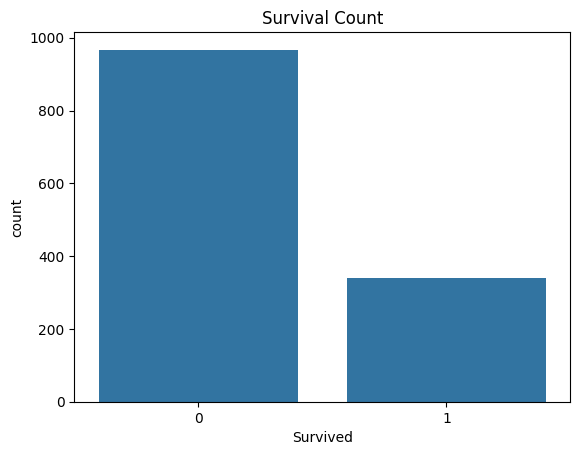

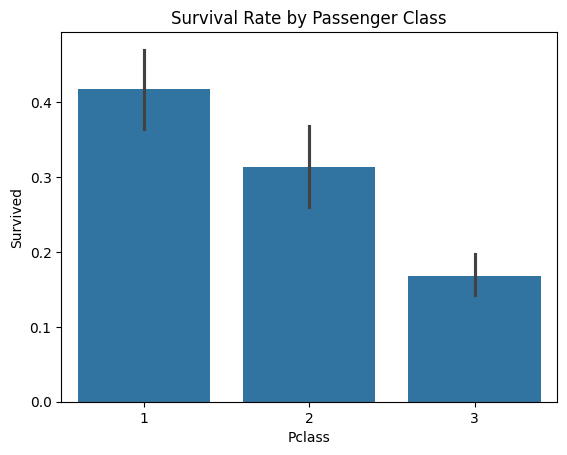

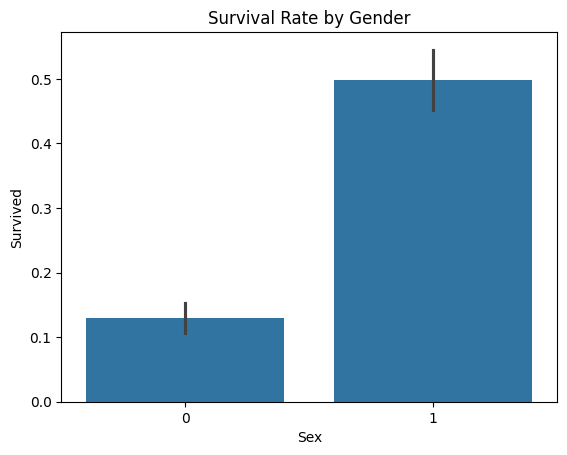

In [3]:
# Visualize Survival Count
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

# Survival by Class
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()

# Survival by Gender
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Gender")
plt.show()


In [4]:
# Select relevant features
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
X = pd.get_dummies(X, columns=['Sex'], drop_first=True)  # Convert 'Sex' to numeric
y = df['Survived']  # Target variable

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       192
           1       0.60      0.50      0.55        70

    accuracy                           0.78       262
   macro avg       0.72      0.69      0.70       262
weighted avg       0.77      0.78      0.77       262



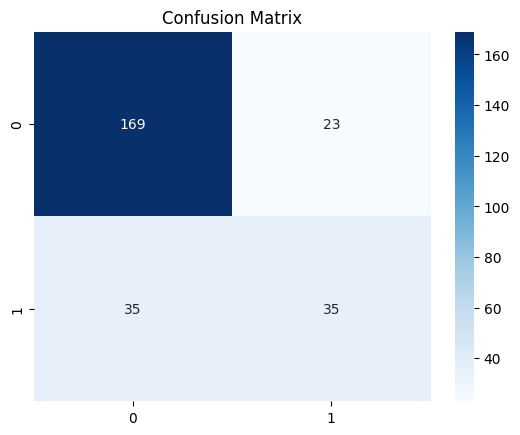

In [5]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()
